In [27]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
import numpy as np
import pickle
import codecs
%pylab inline
matplotlib.rcParams.update({'font.size': 20,'axes.labelsize'      : 50})

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [31]:
data = {}
parameters = {}
# Loading simulations results (produced in /bin with make pip)
with codecs.open('pipNLC_T100_n5000_step0.01_repl_100_b20_ip0.01.pkle','rb') as f:
    data['nlc'],parameters['nlc'] = pickle.Unpickler(f,fix_imports=True,encoding='bytes').load()
with codecs.open('pipGST_T100_n5000_step0.01_repl_25_b20_ip0.01.pkle','rb') as f:
    data['gst'],parameters['gst'] = pickle.Unpickler(f,fix_imports=True,encoding='bytes').load()
with codecs.open('pipTOY_T100_n5000_step0.01_repl_100_b20_ip0.01.pkle','rb') as f:
    data['toy'],parameters['toy'] = pickle.Unpickler(f,fix_imports=True,encoding='bytes').load()

In [28]:
def pip(array):
    """
    Use matplotlib to draw a pairwise_invasibility plot.

    Args:
        array (np.array): a matrix giving the i_nvasion fitness for different
        values of the resident and mutant traits.
    
    """
    
    cmap = mcolors.ListedColormap([(1, 1, 1), 
                                   (0.2, 0.2, 0.2)])
    plt.contourf(array, cmap=cmap, levels=[-1000,1,1000])

    def fraction_tick(y, pos=0):
        return '{:0.1f}'.format(float(y)/(len(array)-1))

    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(fraction_tick))
    ax.xaxis.set_major_formatter(FuncFormatter(fraction_tick))
    plt.xlabel("$\hat{z}$")
    plt.ylabel("$z$")

{b'invfitness_g': 10, b'ip': 0.01, b'alpha': 0.75, b'kmax': 10, b'c': 1, b'T_range': [20, 100], b'n': 5000, b'b_range': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40], b'time': b'Mon Mar  9 04:57:12 2015', b'precision': 0.01, b'g': 100, b'range_g': [10, 50, 100, 200], b'host': b'Linux|sobek|3.13.0-45-generic|#74-Ubuntu SMP Tue Jan 13 19:36:28 UTC 2015|x86_64|x86_64', b'model_name': b"<class 'pimad.models.toycontinuous.ToyContinuous'>", b'pip_step': 0.01, b'lk_R': 1000, b'range_ip': [0.001, 0.005, 0.01, 0.05, 0.1], b's': 0.1, b'mu': 0, b'thres_r': 1, b'k': 0.3, b'b': 20, b'T': 100, b'dz': 0.01, b'chi': 4, b'replica': 100}


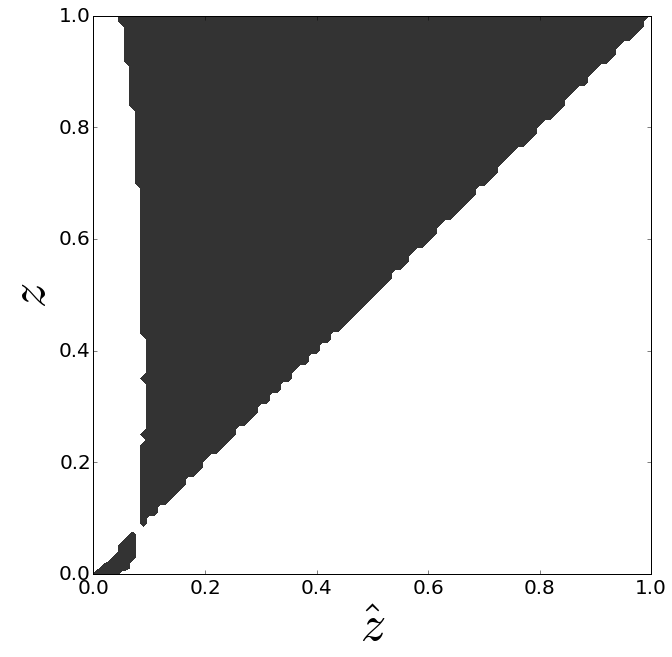

In [36]:
plt.figure(figsize=(10,10))
pip(data['toy'])
plt.savefig('pip_toy.eps',bbox_inches='tight')
print(parameters['toy'])

{b'invfitness_g': 10, b'ip': 0.01, b'alpha': 0.75, b'kmax': 10, b'c': 1, b'T_range': [20, 100], b'n': 5000, b'b_range': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40], b'time': b'Thu Mar  5 23:16:30 2015', b'precision': 0.01, b'g': 100, b'range_g': [10, 50, 100, 200], b'host': b'Linux|atoum|3.13.0-45-generic|#74-Ubuntu SMP Tue Jan 13 19:36:28 UTC 2015|x86_64|x86_64', b'model_name': b"<class 'pimad.models.toycontinuous.ToyContinuousGST'>", b'pip_step': 0.01, b'lk_R': 1000, b'range_ip': [0.001, 0.005, 0.01, 0.05, 0.1], b's': 0.1, b'mu': 0, b'thres_r': 1, b'k': 0.3, b'b': 20, b'T': 100, b'dz': 0.01, b'chi': 4, b'replica': 25}


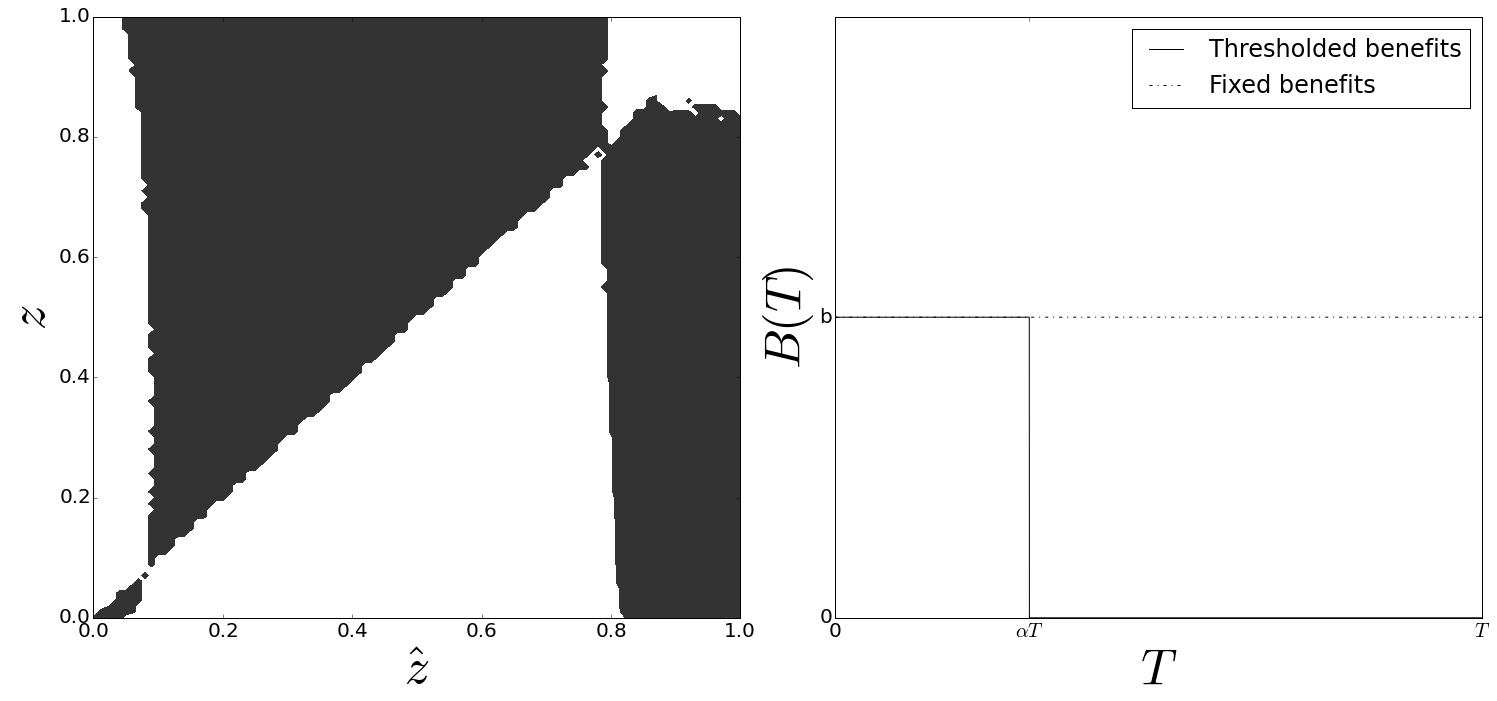

In [35]:
plt.figure(figsize=(20,10))
plt.subplot(122)

alpha = .3
T = 100
x = np.arange(0,T,step=0.001)

plt.plot(x,[1 if z<alpha*T else 0 for z in x],"k-",
         label=r"Thresholded benefits")
plt.plot(x,[1]*len(x),"k-.",label="Fixed benefits")

plt.legend()
plt.ylim(0,2)
plt.yticks((0,1),(0,"b"))
plt.xticks([0,alpha*T ,T],("0",r"$\alpha T$",r"$T$"))
plt.xlabel(r"$T$")
plt.ylabel(r"$B(T)$")
plt.tight_layout()
plt.subplot(121)

pip(data['gst'])

plt.savefig('pip_gst.eps',bbox_inches='tight')
print(parameters['gst'])

## Non linear cost

{b'invfitness_g': 10, b'ip': 0.01, b'alpha': 0.75, b'kmax': 10, b'c': 1, b'T_range': [20, 100], b'n': 5000, b'b_range': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40], b'time': b'Sun Sep  6 10:38:27 2015', b'precision': 0.01, b'mdl': 0, b'range_g': [10, 50, 100, 200], b'host': b'Linux|geb|3.13.0-62-generic|#102-Ubuntu SMP Tue Aug 11 14:29:36 UTC 2015|x86_64|x86_64', b'g': 100, b'model_name': b"<class 'pimad.models.toycontinuous.ToyContinuousNLC'>", b'pip_step': 0.01, b'lk_R': 1000, b'range_ip': [0.001, 0.005, 0.01, 0.05, 0.1], b's': 0.1, b'b': 20, b'thres_r': 1, b'k': 0.3, b'mu': 0, b'T': 100, b'dz': 0.01, b'chi': 4, b'replica': 100}


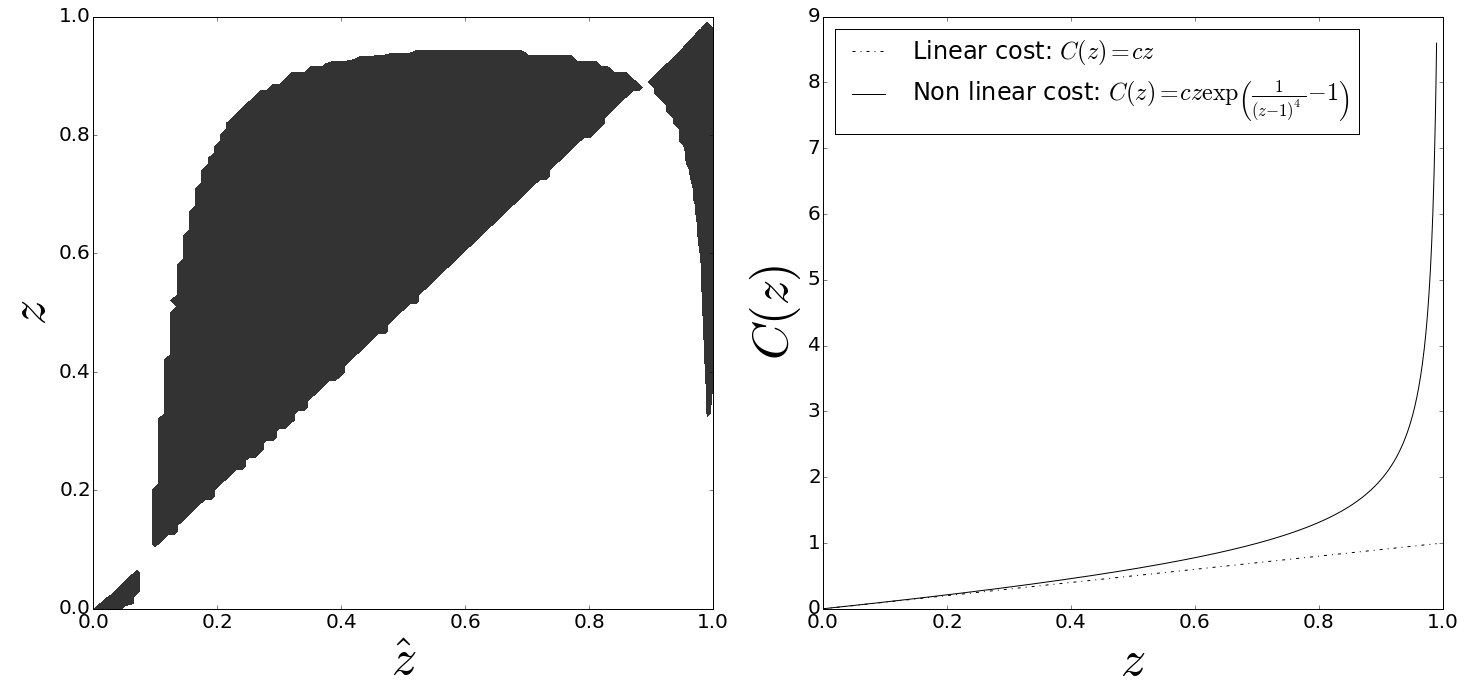

In [30]:
def cost(z,c,chi):
    return c* z * np.exp( (1-z)**(-1.0/chi) - 1 ) 
plt.figure(figsize=(20,10))
plt.subplot(122)
x = np.linspace(0,1,1000)[:-10]
plt.plot(x,x,"k-.",label="Linear cost: $C(z)=cz$")
plt.plot(x,cost(x,1,4),"k-",
         label=r"Non linear cost: $C(z)=cz \exp\left(\frac{1}{(z-1)^4} - 1\right )$")
plt.legend(loc="upper left")
plt.xlabel(r"$z$")
plt.ylabel(r"$C(z)$")
plt.subplot(121)
plt.tight_layout()
pip(data['nlc'])

plt.savefig('pip_nlc.eps',bbox_inches='tight')
print(parameters['nlc'])